# Seattle Airbnb Open Data Exploration
## by Florian Wimmer

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

The following Airbnb activity is included in this Seattle dataset:
- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

My research questions are the following:
1. Correlation between availability and prices of listings
2. Correlation between price and location of the listings in Seattle
3. How strong did the amount of hosts grow in the last years?

<a id='wrangling'></a>
## Data Wrangling

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gather

In [2]:
calendar = pd.read_csv("calendar.csv")
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
listings = pd.read_csv("listings.csv")
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
reviews = pd.read_csv("reviews.csv")
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### Assess

In [5]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [6]:
calendar.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [7]:
calendar.price.value_counts()

$150.00    36646
$100.00    31755
$75.00     29820
$125.00    27538
$65.00     26415
           ...  
$780.00        1
$616.00        1
$674.00        1
$603.00        1
$686.00        1
Name: price, Length: 669, dtype: int64

In [8]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [9]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [10]:
listings.host_neighbourhood.value_counts()

Capitol Hill          405
Belltown              254
Ballard               210
Minor                 191
Queen Anne            189
                     ... 
Pinehurst               1
Kauaʻi                  1
South Beacon Hill       1
Northwest District      1
Downtown Toronto        1
Name: host_neighbourhood, Length: 102, dtype: int64

In [11]:
listings.city.value_counts()

Seattle                  3810
Seattle                     2
West Seattle                2
seattle                     1
西雅图                         1
Ballard, Seattle            1
Phinney Ridge Seattle       1
Name: city, dtype: int64

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


#### Observations

- calendar.listing_id is of type int, not a string
- calendar.date is of type object, not a date time
- calendar.price is of type object, not a float


- listings.id is of type int, not a string
- listings.price is of type object, not a float


- reviews.listing_id is of type int, not a string
- reviews.id is of type int, not a string
- reviews.date is of type pbject, not a date time
- reviews.reviewer_id is of type int, not a string

### Clean

#### Define

Change the following columns to type string
- calendar.listing_id
- listings.id
- reviews.listing_id
- reviews.id
- reviews.reviewer_id

#### Code

In [13]:
# Convert columns to a string
calendar.listing_id = calendar.listing_id.astype(str)
listings.id = listings.id.astype(str)
reviews.listing_id = reviews.listing_id.astype(str)
reviews.id = reviews.id.astype(str)
reviews.reviewer_id = reviews.reviewer_id.astype(str)

#### Test

In [14]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  object
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: object(4)
memory usage: 42.5+ MB


In [15]:
listings.id.dtype

dtype('O')

In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  object
 1   id             84849 non-null  object
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  object
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: object(6)
memory usage: 3.9+ MB


#### Define

Change the following columns to type float
- calendar.price
- listings.price

#### Code

In [17]:
calendar.price.head(5)

0    $85.00
1    $85.00
2       NaN
3       NaN
4       NaN
Name: price, dtype: object

In [18]:
listings.price.head(5)

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

In [19]:
# Remove Dollar sign from the price column and convert to a float
calendar.price = calendar.price.astype(str)
calendar.price = calendar.price.str.replace("[$, ]", "").astype("float")

<ipython-input-19-57a53542e534>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  calendar.price = calendar.price.str.replace("[$, ]", "").astype("float")


In [20]:
listings.price = listings.price.astype(str)
listings.price = listings.price.str.replace("[$, ]", "").astype("float")

<ipython-input-20-cd1a93d117fa>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  listings.price = listings.price.str.replace("[$, ]", "").astype("float")


#### Test

In [21]:
calendar.price.head(5)

0    85.0
1    85.0
2     NaN
3     NaN
4     NaN
Name: price, dtype: float64

In [22]:
listings.price.head(5)

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

#### Define

Change the following columns to type date time
- calendar.date
- reviews.date

#### Code

In [23]:
# Convert columns to date time
calendar.date = pd.to_datetime(calendar.date)
reviews.date = pd.to_datetime (reviews.date)

#### Test

In [24]:
calendar.date.head(2)

0   2016-01-04
1   2016-01-05
Name: date, dtype: datetime64[ns]

In [25]:
reviews.date.head(2)

0   2015-07-19
1   2015-07-20
Name: date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis

In [26]:
calendar.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0


In [27]:
# Adding a new column with the month of a year
calendar["month"] = calendar["date"].dt.month
calendar["year"] = calendar["date"].dt.year

In [28]:
calendar.head(2)

,listing_id,date,available,price,month,year
0,241032,2016-01-04,t,85.0,1,2016
1,241032,2016-01-05,t,85.0,1,2016


### 1. Correlation between availability and prices of listings

In [29]:
calendar.price.describe()

count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

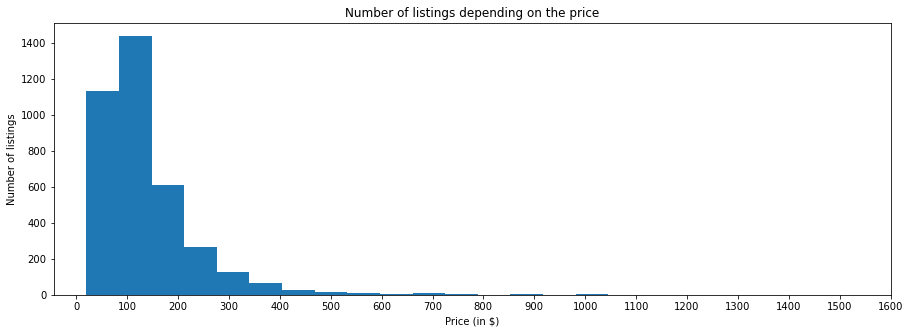

In [30]:
# Plotting the average price of all listings
mean_price = calendar.groupby("listing_id").mean()["price"]

plt.figure(figsize=(15,5))
plt.hist(mean_price, bins=20)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel("Number of listings")
plt.xlabel("Price (in $)")
plt.title("Number of listings depending on the price")
plt.show()

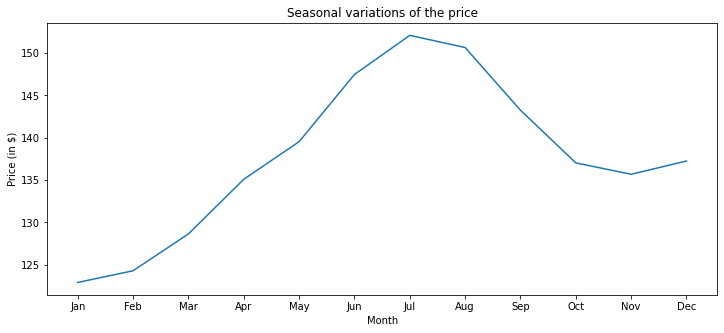

In [31]:
# Plotting the change of the price over the months of a year
fig, ax = plt.subplots(1,1, figsize =(12,5))

new_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(range(1,13))
ax.set_xticklabels(new_labels)

plt.plot(calendar.groupby("month").mean().sort_values("month", ascending = True)["price"])
plt.xlabel("Month")
plt.ylabel("Price (in $)")
plt.title("Seasonal variations of the price");

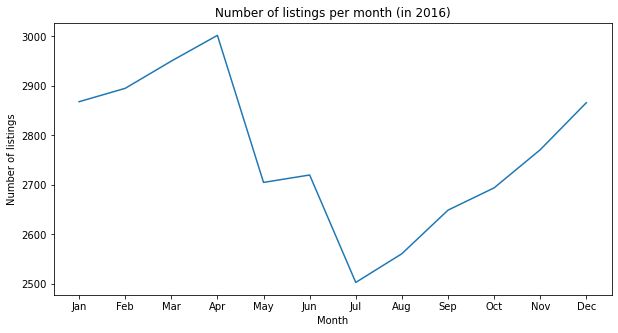

In [32]:
#Plotting the amount of available listings over the months of the year 2016
number_of_listings_by_month = pd.Series([12])
for i in range(1, 13):
    number_of_listings_by_month[i] = len(calendar[(calendar["month"] == i) & (calendar["year"] == 2016) 
                                                  & (calendar["available"] == "t")]["listing_id"].unique())
    
number_of_listings_by_month = number_of_listings_by_month.drop(0)

fig, ax = plt.subplots(1,1, figsize =(10,5))

new_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(range(1,13))
ax.set_xticklabels(new_labels)

plt.plot(number_of_listings_by_month)
plt.xlabel("Month")
plt.ylabel("Number of listings")
plt.title("Number of listings per month (in 2016)");

The highest price can be observed in July. Generally, during the summer months (May - September) the price is higher than in the rest of the year. The months from January to May are related to the lowest price.

A suitable observations is that the number of listings is low during the summer months and the month with the lowest amount is July. This corresponds to the graph of prices.

### 2. Correlation between price and location of the listings in Seattle

In [33]:
# Looking at the distribution of prices accross neighbourhoods
listings.groupby("neighbourhood_group_cleansed").mean().sort_values("price", ascending = False)[["price"]]

,price
neighbourhood_group_cleansed,
Magnolia,177.672131
Queen Anne,157.223729
Downtown,154.405660
West Seattle,141.359606
Cascade,140.101124
Capitol Hill,130.592593
Central Area,128.338753
Ballard,124.682609
Other neighborhoods,119.968514


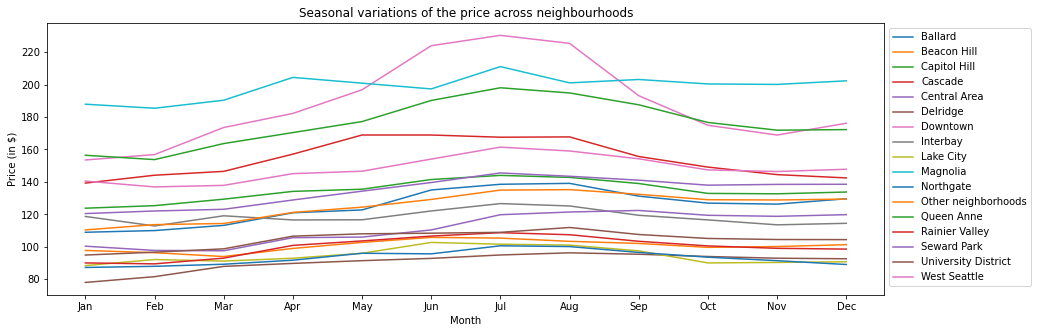

In [34]:
fig, ax = plt.subplots(1,1, figsize =(15,5))
new_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(range(1,13))
ax.set_xticklabels(new_labels)
pd.merge(calendar, listings[["id","neighbourhood_group_cleansed"]], 
         left_on = "listing_id", right_on = "id").groupby(["month", "neighbourhood_group_cleansed"]).mean()["price"].unstack().plot(ax=ax)
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel("Month")
plt.ylabel("Price (in $)")
plt.title("Seasonal variations of the price across neighbourhoods");

In this graph you can see that there are several differences between the neighbourhoods of Seattle. Obviously, there are neighbourhoods where the price for a listing is higher (Downtown, Magnolia) and there are neighbourhoods where the price for a listing is lower (Northgate, Lake City).

You can also observe the differences between months which have been dealed with in the first question. Especially in Downtown the peak is clearly visible.

### 3. How strong did the amount of hosts grow in the last years?

In [35]:
listings["host_since"].value_counts().sort_index()

2008-11-10    4
2009-01-08    1
2009-02-16    2
2009-03-03    1
2009-03-30    1
             ..
2015-12-29    1
2015-12-30    1
2016-01-01    1
2016-01-02    2
2016-01-03    2
Name: host_since, Length: 1380, dtype: int64

In [36]:
listings.host_since.isnull().sum()

2

In [37]:
listings.shape

(3818, 92)

In [38]:
# There are 2 rows with no information about "host since". I will delete these 2 rows.
listings = listings.dropna(subset=["host_since"], how="any", axis=0)
listings.shape

(3816, 92)

In [41]:
# Creating 3 new columns with information about year, month and year-month for the "host_since" column.
listings["host_since_year"] = pd.DatetimeIndex(listings["host_since"]).year.astype(int)
listings["host_since_month"] = pd.DatetimeIndex(listings["host_since"]).month.astype(int)
listings["host_since_year-month"] = pd.to_datetime(listings["host_since"]).dt.to_period("M")

In [42]:
new_hosts_per_year = listings["host_since_year"].value_counts().sort_index()
new_hosts_per_year

2008      4
2009     64
2010    149
2011    398
2012    539
2013    776
2014    900
2015    981
2016      5
Name: host_since_year, dtype: int64

In [43]:
# For the years 2008 and 2016 the data is only available for parts of the year. Therefore I will remove these years.
host_count_per_year = new_hosts_per_year[1:-1].rename_axis("year").reset_index(name="host_count")
host_count_per_year

,year,host_count
0,2009,64
1,2010,149
2,2011,398
3,2012,539
4,2013,776
5,2014,900
6,2015,981


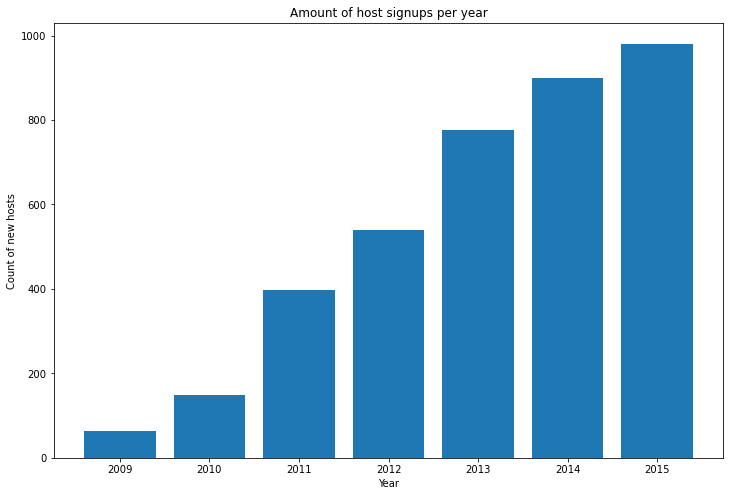

In [44]:
# Plotting the amount of host signups per year
year = host_count_per_year["year"]
year_count = host_count_per_year["host_count"]

fig,ax = plt.subplots(figsize=(12,8))
ax.bar(year, year_count)
ax.set_xlabel("Year")
ax.set_ylabel("Count of new hosts")
ax.set_title("Amount of host signups per year");

In [45]:
# Creating a table with host signups by month
new_hosts_per_month = listings["host_since_month"].value_counts().sort_index()
host_count_per_month = new_hosts_per_month.rename_axis("month").reset_index(name="host_count")
host_count_per_month

,month,host_count
0,1,271
1,2,271
2,3,299
3,4,278
4,5,352
5,6,296
6,7,415
7,8,490
8,9,330
9,10,313


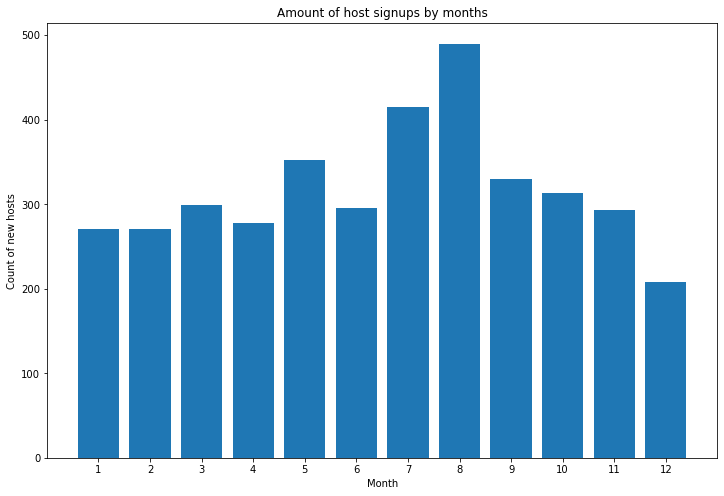

In [46]:
# Plotting the amount of host signups in the different months
month = host_count_per_month["month"]
month_count = host_count_per_month["host_count"]

fig,ax = plt.subplots(figsize=(12,8))
ax.bar(month, month_count)
plt.xticks(np.arange(1, 13, 1))
ax.set_xlabel("Month")
ax.set_ylabel("Count of new hosts")
ax.set_title("Amount of host signups by months");

The host signups are constantly growing every year since 2009. Starting with 64 in 2009 already in 2013 the amount of signups is more than ten times larger (776).

The most signups happen in July and August while the least signups can be observed in December. This is in my opinion very logical because during summer you probably see many tourists in the city or notice from friends that they are hosting guests.

<a id='conclusions'></a>
## Conclusions

In the first research question I asked if there is a correlation between availability and prices of listings. This is the case since July is the month with the lowest amount of listings and the highest price. Also in the other summer months this correlations can be observed. The second research question was about the correlation between price and location of the listings in Seattle. The most expensive neighbourhoods for Airbnb listings in Seattle are Downtown and Magnolia while the cheapest are e.g. Northgate and Lake City. In the third research question I asked if and how strong the amount of hosts did grow in the last years. The amount of host signups is growing every year since 2009. After four years the number is more than ten times larger.

Although I already had several interesting findings, there are limitations on my exploration. There is much more information in the dataset that could be used, e.g. reviews or different amenities that a listing has. For further analysis it would also be very interesting to compare this dataset with the dataset of another city because Airbnb is providing data for many more cities.